# DBSCAN: <B>Density-based Spatial Clustering of Applications with noise </B>
<p> In DBSCAN, a special label is assigned to each sample (point) using the following criteria;
    - a point is considered as <B>core point</B> if at least a specified number (MinPts) of neighboring points fall within a given radius r.
    - A <B>border point</B> is a point that has fewer neighbors than MinPts within r, but lies within the r radius of the core point. 
    - All other points that are neither core points nor border points are considered as <B> noise points </B>
   After labelling these points as core, border, or noise points, the DBSCAN algorithm can be summarized in two steps:
    1. Form a separate cluster for each core point or connected group of core points (core points are connected if they are no further away than r)
    2. Assign each border point to the cluster of its corresponding core point.</p>

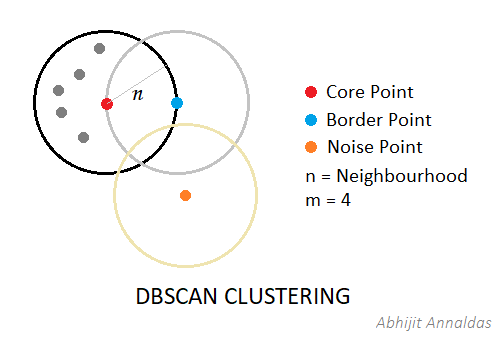

The main advantage of using DBSCAN is that it does not assume that the clusters have spherical shape as in k-means. 
However despite not assigning each point to a cluster it is capable of removing noise points.
Let us use the half-moon-shaped structures dataset to illustrate the algorithm. 

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,Y = make_moons (n_samples =200, noise =0.05, random_state = 0)
plt.scatter(X[:,0], X[:,1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

As you can see there are two visible, half-moon-shaped groups consisting of 100 sample points each

Let us begin byusing the k-means algorithm and complete linkage clustering to see whether one of those previously discussed clustering algorithms can successfully identify the half-moon shapes as separate clusters.

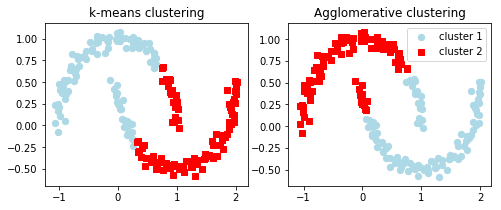

In [7]:
import matplotlib
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#k-means clustering
f, (ax1, ax2) = plt.subplots(1,2, figsize= (8,3))
km = KMeans(n_clusters = 2, random_state =0)
y_km =km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c ='lightblue',
            marker ='o', 
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c= 'red',
            marker ='s', 
            s=40,
            label='cluster 2')
ax1.set_title('k-means clustering')

#Anglomerative clustering
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
           X[y_ac==0,1],
           c='lightblue',
           marker='o',
           s=40,
           label='cluster 1')
ax2.scatter(X[y_ac==1,0],
           X[y_ac==1,1],
           c='red',
           marker='s',
           s=40,
           label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

# Using DBSCAN

Now let us try with DBSCAN algorithm on the same dataset to see if it can find the two half-moon-shaped clusters using density-based approach;

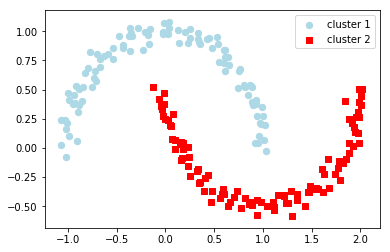

In [8]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.2,
           min_samples=5,
           metric='euclidean')
y_db = db.fit_predict (X)
plt.scatter(X[y_db==0,0],
           X[y_db==0,1],
           c='lightblue',
           marker='o',
           s=40,
           label='cluster 1')
plt.scatter(X[y_db==1,0],
           X[y_db==1,1],
           c='red',
           marker='s',
           s=40,
           label='cluster 2')
plt.legend()
plt.show()